In [1]:
import ROOT
import math
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/00


In [2]:
# PDF and Renorm recipes from :
# https://indico.cern.ch/event/494682/contributions/1172505/attachments/1223578/1800218/mcaod-Feb15-2016.pdf

In [3]:
'''
SUSY_pred = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_SUSY_pred.txt')
tt_pred   = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_tt_pred.txt')
st_pred   = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_st_pred.txt')
vv_pred   = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_vv_pred.txt')

SUSY_mask = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_sig_selected_indices.txt')
tt_mask   = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_tt_selected_indices.txt')
st_mask   = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_st_selected_indices.txt')
vv_mask   = np.loadtxt('txt_files/Mstop_182_5_mchi_7_5_vv_selected_indices.txt')


'''
SUSY_pred = np.loadtxt('txt_files/Mstop_235_mchi_60_SUSY_pred.txt')
tt_pred   = np.loadtxt('txt_files/Mstop_235_mchi_60_tt_pred.txt')
st_pred   = np.loadtxt('txt_files/Mstop_235_mchi_60_st_pred.txt')
vv_pred   = np.loadtxt('txt_files/Mstop_235_mchi_60_vv_pred.txt')

SUSY_mask = np.concatenate([np.zeros(15000, dtype=bool), np.ones(len(SUSY_pred), dtype=bool)])
tt_mask   = np.concatenate([np.zeros(30000, dtype=bool), np.ones(len(tt_pred), dtype=bool)])
st_mask   = np.concatenate([np.zeros(5000, dtype=bool), np.ones(len(st_pred), dtype=bool)])
vv_mask   = np.concatenate([np.zeros(2000, dtype=bool), np.ones(len(vv_pred), dtype=bool)])

In [4]:
SUSY_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Index 0 Nominal, index 5 and 7 unphysical
    if (i == 0 or i == 5 or i == 7 ) : continue
        
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file    = 'Renorm_variation_' + str(i) + '.txt'
        weight_file = np.loadtxt('Weights/SUSY/Mstop_235/Renorm/' + str(var_file))
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
        weight_file = np.loadtxt('Weights/SUSY/Mstop_235/PDF/'   + str(var_file))
    
    arr, bins      = np.histogram(SUSY_pred, bins=15, weights =weight_file[SUSY_mask == 1])
    SUSY_full_arr.append(arr)

In [5]:
SUSY_ren_mat = np.matrix(SUSY_full_arr[0:6]) # Changing from 10 to 6

In [6]:
SUSY_pdf_mat = np.matrix(SUSY_full_arr[6:]) # Changing from 10 to 6

In [14]:
tt_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Index 0 Nominal, index 5 and 7 unphysical
    if (i == 0 or i == 5 or i == 7 ) : continue
        
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/ttbar/' + str(var_file))
    arr, bins      = np.histogram(tt_pred, bins=15, weights =weight_file[tt_mask == 1])
    tt_full_arr.append(arr)

In [15]:
tt_ren_mat = np.matrix(tt_full_arr[0:6]) # Changing from 10 to 6

In [16]:
tt_pdf_mat = np.matrix(tt_full_arr[6:])  # Changing from 10 to 6

In [17]:
st_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Index 0 Nominal, index 5 and 7 unphysical
    if (i == 0 or i == 5 or i == 7 ) : continue
        
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/ST/' + str(var_file))
    arr, bins      = np.histogram(st_pred, bins=15, weights =weight_file[st_mask == 1])
    st_full_arr.append(arr)

In [18]:
st_ren_mat = np.matrix(st_full_arr[0:6])
st_pdf_mat = np.matrix(st_full_arr[6:])

In [19]:
vv_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Index 0 Nominal, index 5 and 7 unphysical
    if (i == 0 or i == 5 or i == 7 ) : continue
        
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/VV/' + str(var_file))
    arr, bins      = np.histogram(vv_pred, bins=15, weights =weight_file[vv_mask == 1])
    vv_full_arr.append(arr)
    
vv_ren_mat = np.matrix(vv_full_arr[0:6])
vv_pdf_mat = np.matrix(vv_full_arr[6:])

In [20]:
SUSY_pdf_unc = SUSY_pdf_mat.std(0)/ SUSY_pdf_mat.mean(0) * 0.41 * 100
tt_pdf_unc   = tt_pdf_mat.std(0)  / tt_pdf_mat.mean(0)   * 0.41 * 100
st_pdf_unc   = st_pdf_mat.std(0)  / st_pdf_mat.mean(0)   * 0.41 * 100
vv_pdf_unc   = vv_pdf_mat.std(0)  / vv_pdf_mat.mean(0)   * 0.41 * 100

In [21]:
# Combining like ren's here, not envolope
SUSY_ren_unc = SUSY_ren_mat.std(0)/ SUSY_ren_mat.mean(0) * 0.5 * 100   
tt_ren_unc   = tt_ren_mat.std(0)  / tt_ren_mat.mean(0)   * 0.5 * 100
st_ren_unc   = st_ren_mat.std(0)  / st_ren_mat.mean(0)   * 0.5 * 100
vv_ren_unc   = vv_ren_mat.std(0)  / vv_ren_mat.mean(0)   * 0.5 * 100

In [22]:
bin_centers  = (bins[:-1] + bins[1:])/2

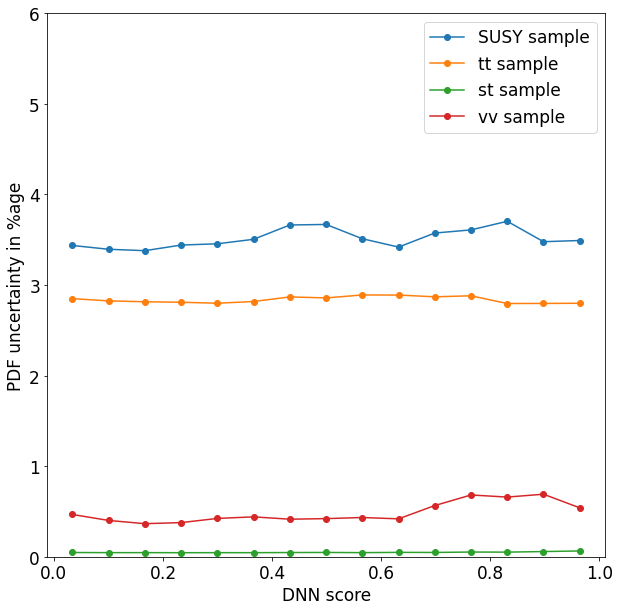

In [30]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(SUSY_pdf_unc).reshape(-1), '-o', label='SUSY sample')
ax.plot(bin_centers, np.array(tt_pdf_unc).reshape(-1) , '-o', label='tt sample')
ax.plot(bin_centers, np.array(st_pdf_unc).reshape(-1) , '-o', label='st sample')
ax.plot(bin_centers, np.array(vv_pdf_unc).reshape(-1) , '-o', label='vv sample')
ax.set_ylabel('PDF uncertainty in %age', fontsize=17)
ax.set_xlabel('DNN score', fontsize=17)
ax.set_ylim(0,6)
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='upper right')

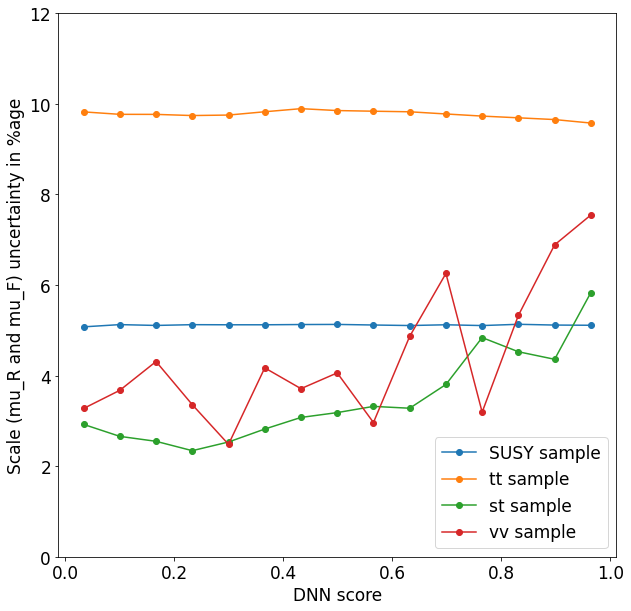

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(SUSY_ren_unc).reshape(-1), '-o', label='SUSY sample')
ax.plot(bin_centers, np.array(tt_ren_unc).reshape(-1) , '-o', label='tt sample')
ax.plot(bin_centers, np.array(st_ren_unc).reshape(-1) , '-o', label='st sample')
ax.plot(bin_centers, np.array(vv_ren_unc).reshape(-1) , '-o', label='vv sample')
ax.set_ylabel('Scale (mu_R and mu_F) uncertainty in %age', fontsize=17)
ax.set_xlabel('DNN score', fontsize=17)
ax.set_ylim(0,12)
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='best')

In [31]:
jet1_up = np.loadtxt('Weights/ttbar/JES/JES_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/ttbar/JES/JES_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/ttbar/JES/JES_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/ttbar/JES/JES_sljet_weight_down.txt')

In [32]:
tt_JES_fin_up   = np.multiply(jet1_up, jet2_up)
tt_JES_fin_down = np.multiply(jet1_dn, jet2_dn)

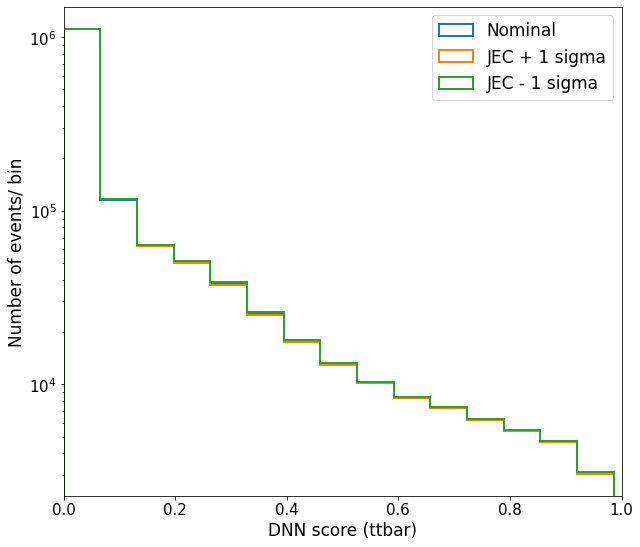

In [33]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JEC + 1 sigma', linewidth=2 , weights=tt_JES_fin_up[tt_mask == 1])
ns3,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JEC - 1 sigma', linewidth=2 , weights=tt_JES_fin_down[tt_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (ttbar)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [34]:
tt_JES_unc  = abs((ns3 - ns2) / ns1) * 50

In [35]:
np.matmul(ns1, tt_JES_unc)/ sum(ns1) 

0.36220674099103495

In [36]:
jet1_up = np.loadtxt('Weights/ttbar/JER/JER_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/ttbar/JER/JER_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/ttbar/JER/JER_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/ttbar/JER/JER_sljet_weight_down.txt')

In [37]:
tt_JER_fin_up   = np.multiply(jet1_up, jet2_up)
tt_JER_fin_down = np.multiply(jet1_dn, jet2_dn)

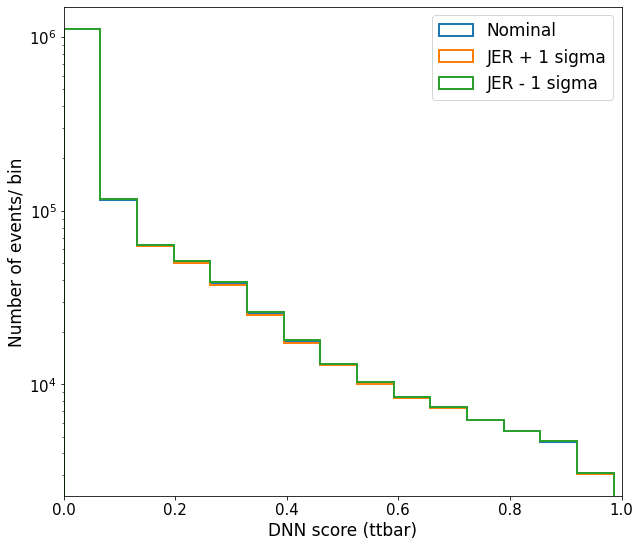

In [38]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JER + 1 sigma', linewidth=2 , weights=tt_JER_fin_up[tt_mask == 1])
ns3,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JER - 1 sigma', linewidth=2 , weights=tt_JER_fin_down[tt_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (ttbar)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [39]:
tt_JER_unc  = abs((ns3 - ns2) / ns1) * 50

In [40]:
np.matmul(ns1, tt_JER_unc)/ sum(ns1) 

0.3092628126511581

In [41]:
jet1_up = np.loadtxt('Weights/SUSY/Mstop_235/JES/JES_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/SUSY/Mstop_235/JES/JES_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/SUSY/Mstop_235/JES/JES_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/SUSY/Mstop_235/JES/JES_sljet_weight_down.txt')

In [42]:
SUSY_JES_fin_up   = np.multiply(jet1_up, jet2_up)
SUSY_JES_fin_down = np.multiply(jet1_dn, jet2_dn)

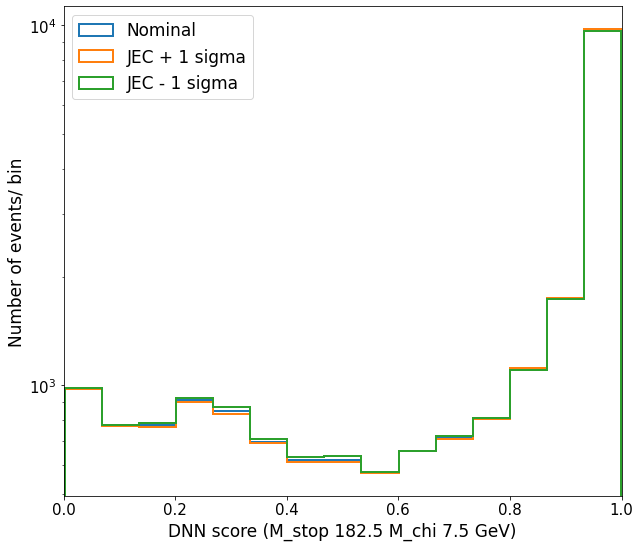

In [43]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JEC + 1 sigma', linewidth=2 , weights=SUSY_JES_fin_up[SUSY_mask == 1])
ns3,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JEC - 1 sigma', linewidth=2 , weights=SUSY_JES_fin_down[SUSY_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (M_stop 182.5 M_chi 7.5 GeV)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper left')

In [44]:
SUSY_JES_unc  = abs((ns3 - ns2) / ns1) * 50

In [45]:
np.matmul(ns1, SUSY_JES_unc)/ sum(ns1) 

0.7501713961819696

In [46]:
jet1_up = np.loadtxt('Weights/SUSY/Mstop_235/JER/JER_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/SUSY/Mstop_235/JER/JER_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/SUSY/Mstop_235/JER/JER_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/SUSY/Mstop_235/JER/JER_sljet_weight_down.txt')

In [47]:
SUSY_JER_fin_up   = np.multiply(jet1_up, jet2_up)
SUSY_JER_fin_down = np.multiply(jet1_dn, jet2_dn)

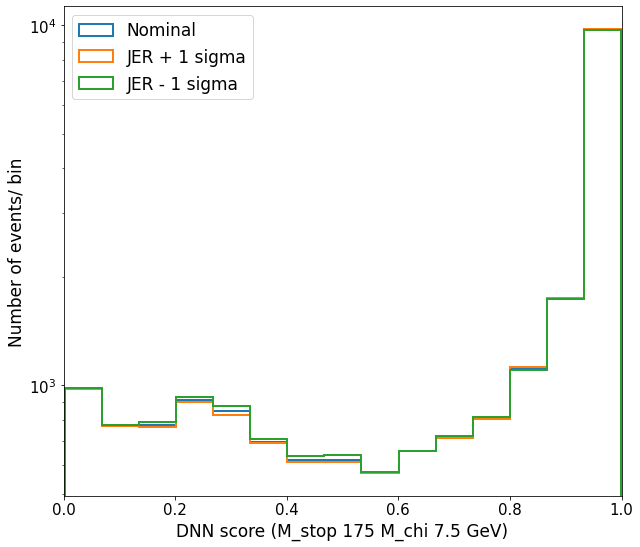

In [48]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JER + 1 sigma', linewidth=2 , weights=SUSY_JER_fin_up[SUSY_mask == 1])
ns3,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JER - 1 sigma', linewidth=2 , weights=SUSY_JER_fin_down[SUSY_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (M_stop 175 M_chi 7.5 GeV)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper left')

In [49]:
SUSY_JER_unc  = abs((ns3 - ns2) / ns1) * 50

In [50]:
jet1_up = np.loadtxt('Weights/ST/JES/JES_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/ST/JES/JES_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/ST/JES/JES_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/ST/JES/JES_sljet_weight_down.txt')

In [51]:
st_JES_fin_up   = np.multiply(jet1_up, jet2_up)
st_JES_fin_down = np.multiply(jet1_dn, jet2_dn)

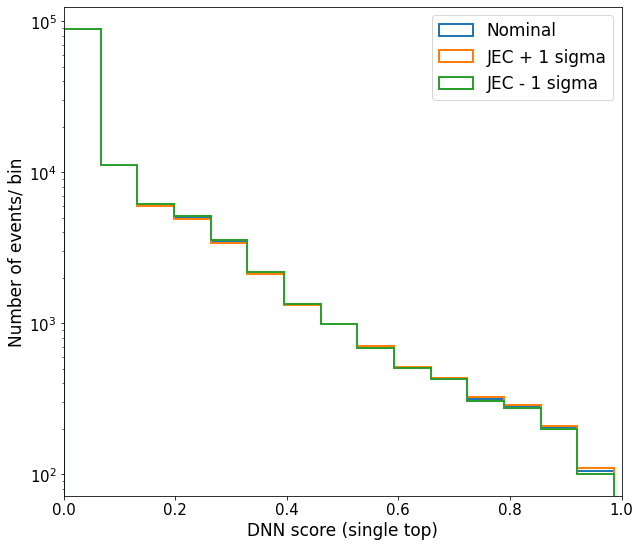

In [52]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(st_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(st_pred, histtype='step', bins=15, label = 'JEC + 1 sigma', linewidth=2 , weights=st_JES_fin_up[st_mask == 1])
ns3,bins1,patches = ax.hist(st_pred, histtype='step', bins=15, label = 'JEC - 1 sigma', linewidth=2 , weights=st_JES_fin_down[st_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (single top)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [53]:
st_JES_unc  = abs((ns3 - ns2) / ns1) * 50

In [54]:
jet1_up = np.loadtxt('Weights/ST/JER/JER_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/ST/JER/JER_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/ST/JER/JER_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/ST/JER/JER_sljet_weight_down.txt')

In [55]:
st_JER_fin_up   = np.multiply(jet1_up, jet2_up)
st_JER_fin_down = np.multiply(jet1_dn, jet2_dn)

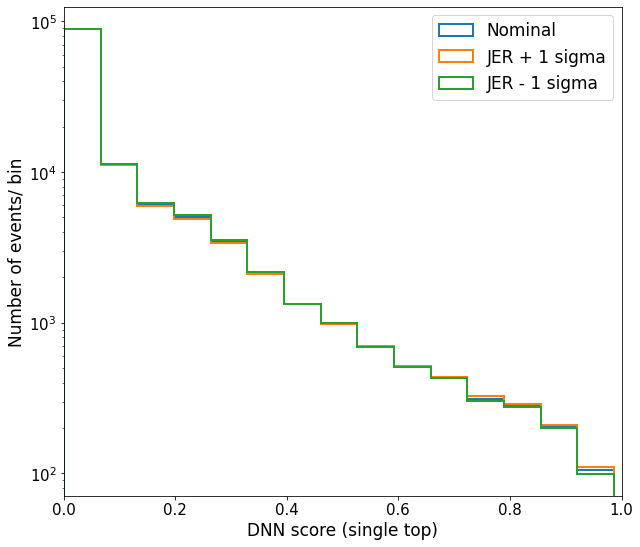

In [56]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(st_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(st_pred, histtype='step', bins=15, label = 'JER + 1 sigma', linewidth=2 , weights=st_JER_fin_up[st_mask == 1])
ns3,bins1,patches = ax.hist(st_pred, histtype='step', bins=15, label = 'JER - 1 sigma', linewidth=2 , weights=st_JER_fin_down[st_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (single top)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [57]:
st_JER_unc  = abs((ns3 - ns2) / ns1) * 50

In [58]:
jet1_up = np.loadtxt('Weights/VV/JES/JES_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/VV/JES/JES_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/VV/JES/JES_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/VV/JES/JES_sljet_weight_down.txt')

In [59]:
vv_JES_fin_up   = np.multiply(jet1_up, jet2_up)
vv_JES_fin_down = np.multiply(jet1_dn, jet2_dn)

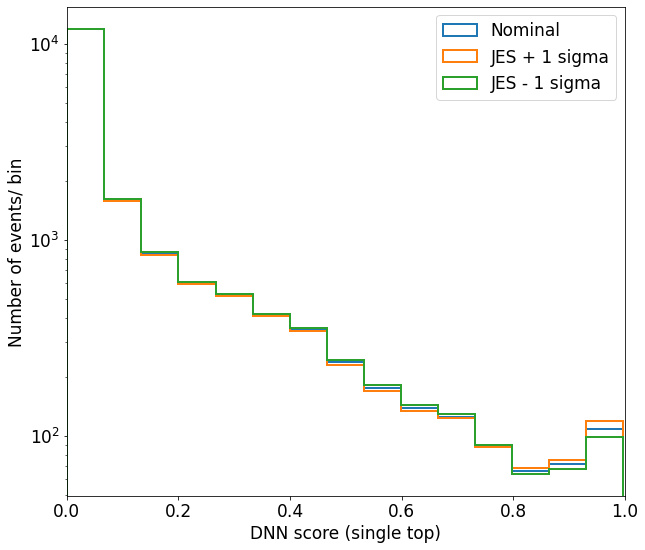

In [60]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(vv_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(vv_pred, histtype='step', bins=15, label = 'JES + 1 sigma', linewidth=2 , weights=vv_JES_fin_up[vv_mask == 1])
ns3,bins1,patches = ax.hist(vv_pred, histtype='step', bins=15, label = 'JES - 1 sigma', linewidth=2 , weights=vv_JES_fin_down[vv_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (single top)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='upper right')

In [61]:
vv_JES_unc  = abs((ns3 - ns2) / ns1) * 50

In [62]:
jet1_up = np.loadtxt('Weights/VV/JER/JER_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/VV/JER/JER_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/VV/JER/JER_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/VV/JER/JER_sljet_weight_down.txt')

In [63]:
vv_JER_fin_up   = np.multiply(jet1_up, jet2_up)
vv_JER_fin_down = np.multiply(jet1_dn, jet2_dn)

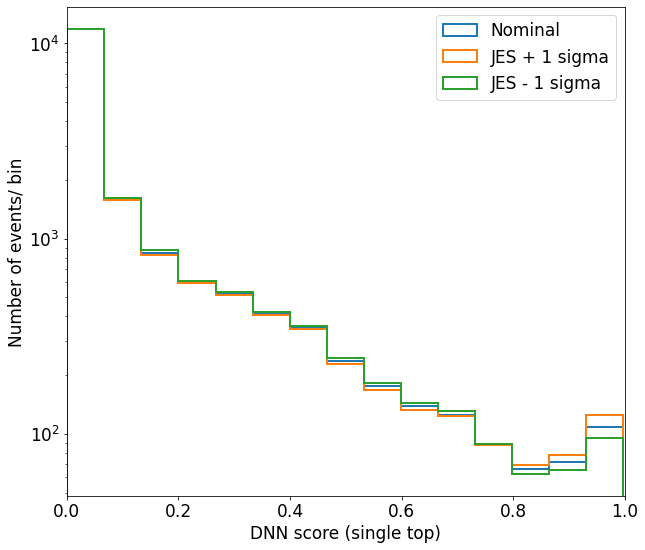

In [64]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(vv_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(vv_pred, histtype='step', bins=15, label = 'JES + 1 sigma', linewidth=2 , weights=vv_JER_fin_up[vv_mask == 1])
ns3,bins1,patches = ax.hist(vv_pred, histtype='step', bins=15, label = 'JES - 1 sigma', linewidth=2 , weights=vv_JER_fin_down[vv_mask == 1])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (single top)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='upper right')

In [65]:
vv_JER_unc  = abs((ns3 - ns2) / ns1) * 50

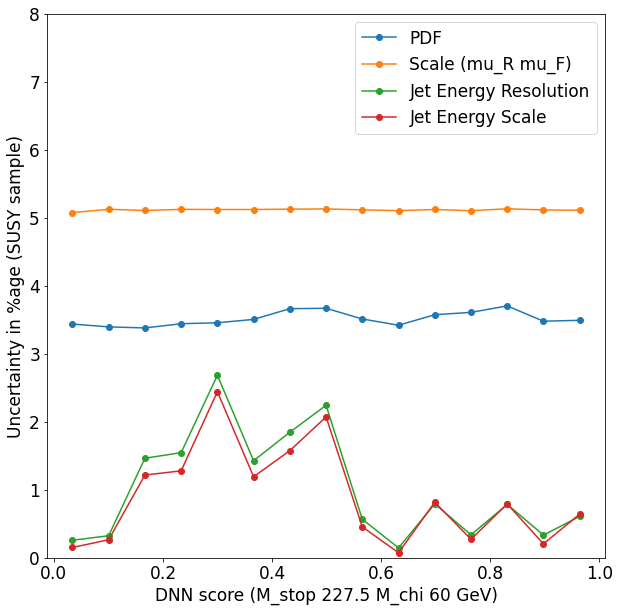

In [75]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(SUSY_pdf_unc).reshape(-1), '-o', label='PDF')
ax.plot(bin_centers, np.array(SUSY_ren_unc).reshape(-1), '-o', label='Scale (mu_R mu_F)')
ax.plot(bin_centers, SUSY_JER_unc                      , '-o', label='Jet Energy Resolution')
ax.plot(bin_centers, SUSY_JES_unc                      , '-o', label='Jet Energy Scale')
ax.set_ylabel('Uncertainty in %age (SUSY sample)', fontsize=17)
ax.set_xlabel('DNN score (M_stop 227.5 M_chi 60 GeV)', fontsize=17)
ax.set_ylim(0,8)
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='best')
plt.savefig('SUSY_unc_mstop_227_5_mchi_60.jpg')

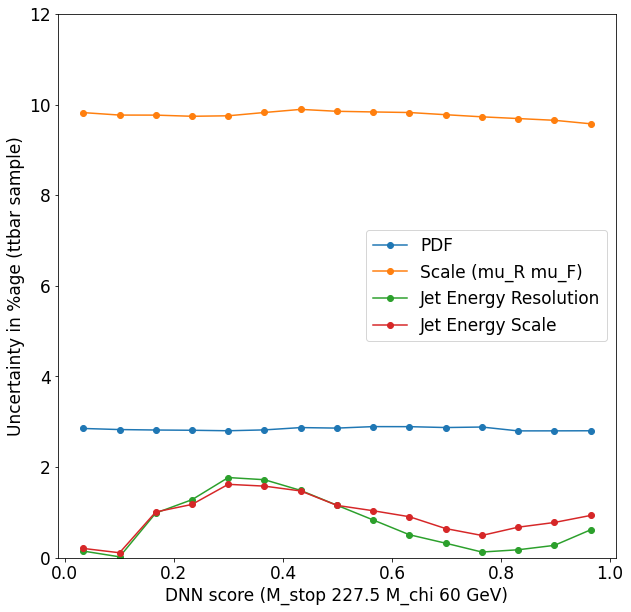

In [76]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(tt_pdf_unc).reshape(-1) , '-o', label='PDF')
ax.plot(bin_centers, np.array(tt_ren_unc).reshape(-1) , '-o', label='Scale (mu_R mu_F)')
ax.plot(bin_centers, tt_JER_unc   , '-o', label='Jet Energy Resolution')
ax.plot(bin_centers, tt_JES_unc   , '-o', label='Jet Energy Scale')
ax.set_ylabel('Uncertainty in %age (ttbar sample)'   , fontsize=17)
ax.set_xlabel('DNN score (M_stop 227.5 M_chi 60 GeV)', fontsize=17)
ax.set_ylim(0,12)
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='best')
plt.savefig('tt_unc_mstop_227_5_mchi_60.jpg')

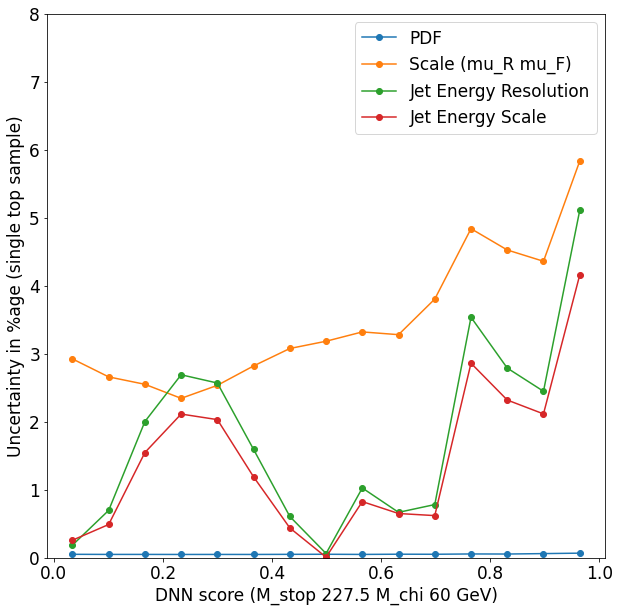

In [77]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(st_pdf_unc).reshape(-1) , '-o', label='PDF')
ax.plot(bin_centers, np.array(st_ren_unc).reshape(-1) , '-o', label='Scale (mu_R mu_F)')
ax.plot(bin_centers, st_JER_unc   , '-o', label='Jet Energy Resolution')
ax.plot(bin_centers, st_JES_unc   , '-o', label='Jet Energy Scale')
ax.set_ylabel('Uncertainty in %age (single top sample)'   , fontsize=17)
ax.set_xlabel('DNN score (M_stop 227.5 M_chi 60 GeV)', fontsize=17)
ax.set_ylim(0,8)
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='best')
plt.savefig('st_unc_mstop_227_5_mchi_60.jpg')

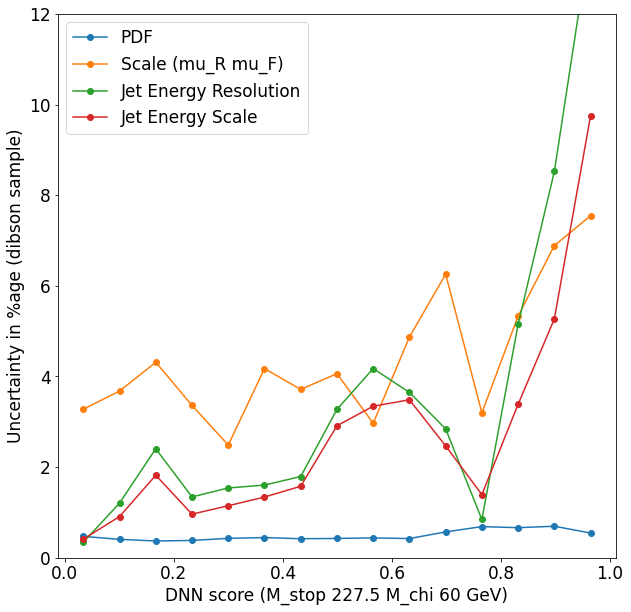

In [73]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(vv_pdf_unc).reshape(-1) , '-o', label='PDF')
ax.plot(bin_centers, np.array(vv_ren_unc).reshape(-1) , '-o', label='Scale (mu_R mu_F)')
ax.plot(bin_centers, vv_JER_unc   , '-o', label='Jet Energy Resolution')
ax.plot(bin_centers, vv_JES_unc   , '-o', label='Jet Energy Scale')
ax.set_ylabel('Uncertainty in %age (dibson sample)'   , fontsize=17)
ax.set_xlabel('DNN score (M_stop 227.5 M_chi 60 GeV)', fontsize=17)
ax.set_ylim(0,12)
ax.tick_params(axis="y", labelsize=17)
ax.tick_params(axis="x", labelsize=17)
ax.legend(prop={'size': 17}, loc='best')
#plt.savefig('st_unc_mstop_227_5_mchi_60.jpg')

In [399]:
sig_df = pd.read_pickle('DNN_ips/SUSY_Mstop_175_mchi_7_5.pkl')
tt_df  = pd.read_pickle('DNN_ips/ttbar.pkl')

In [401]:
SUSY_ljet_pt  = np.array(sig_df['ljet_pt'])
SUSY_sljet_pt = np.array(sig_df['sljet_pt'])

SUSY_ljet_eta = np.array(sig_df['ljet_eta'])
SUSY_sljet_eta= np.array(sig_df['sljet_eta'])

SUSY_l_pt  = np.array(sig_df['lepton_pt'])
SUSY_sl_pt = np.array(sig_df['sublepton_pt'])

SUSY_l_eta = np.array(sig_df['lepton_eta'])
SUSY_sl_eta= np.array(sig_df['sublepton_eta'])

In [403]:
tt_ljet_pt   = np.array(tt_df['ljet_pt'])
tt_sljet_pt  = np.array(tt_df['sljet_pt'])

tt_ljet_eta  = np.array(tt_df['ljet_eta'])
tt_sljet_eta = np.array(tt_df['sljet_eta'])

tt_l_pt      = np.array(tt_df['lepton_pt'])
tt_sl_pt     = np.array(tt_df['sublepton_pt'])

tt_l_eta     = np.array(tt_df['lepton_eta'])
tt_sl_eta    = np.array(tt_df['sublepton_eta'])

In [404]:
SUSY_red_l_pt      = SUSY_l_pt[SUSY_mask == 1]
SUSY_red_sl_pt     = SUSY_sl_pt[SUSY_mask == 1]

SUSY_red_l_eta     = SUSY_l_eta[SUSY_mask == 1]
SUSY_red_sl_eta    = SUSY_sl_eta[SUSY_mask == 1]

SUSY_red_ljet_pt   = SUSY_ljet_pt[SUSY_mask == 1]
SUSY_red_sljet_pt  = SUSY_sljet_pt[SUSY_mask == 1]

SUSY_red_ljet_eta  = SUSY_ljet_eta[SUSY_mask == 1]
SUSY_red_sljet_eta = SUSY_sljet_eta[SUSY_mask == 1]

In [405]:
tt_red_l_pt      = tt_l_pt[tt_mask == 1]
tt_red_sl_pt     = tt_sl_pt[tt_mask == 1]

tt_red_l_eta     = tt_l_eta[tt_mask == 1]
tt_red_sl_eta    = tt_sl_eta[tt_mask == 1]

tt_red_ljet_pt   = tt_ljet_pt[tt_mask == 1]
tt_red_sljet_pt  = tt_sljet_pt[tt_mask == 1]

tt_red_ljet_eta  = tt_ljet_eta[tt_mask == 1]
tt_red_sljet_eta = tt_sljet_eta[tt_mask == 1]

In [406]:
SUSY_pt_1 = []
SUSY_pt_2 = []
SUSY_pt_3 = []

SUSY_eta_1 = []
SUSY_eta_2 = []
SUSY_eta_3 = []

for i in range(len(SUSY_red_ljet_pt)) :
    if SUSY_pred[i] < 0.3 :
        SUSY_pt_1.append(SUSY_red_ljet_pt[i])
        SUSY_eta_1.append(SUSY_red_ljet_eta[i])   
        
    elif SUSY_pred[i] > 0.3 and SUSY_pred[i] < 0.7:
        SUSY_pt_2.append(SUSY_red_ljet_pt[i])
        SUSY_eta_2.append(SUSY_red_ljet_eta[i])    
        
    elif SUSY_pred[i] > 0.7 :
        SUSY_pt_3.append(SUSY_red_ljet_pt[i])
        SUSY_eta_3.append(SUSY_red_ljet_eta[i])

In [407]:
tt_pt_1 = []
tt_pt_2 = []
tt_pt_3 = []

tt_eta_1 = []
tt_eta_2 = []
tt_eta_3 = []

for i in range(len(tt_red_ljet_pt)) :
    if tt_pred[i] < 0.3 :
        tt_pt_1.append(tt_red_ljet_pt[i])
        tt_eta_1.append(tt_red_ljet_eta[i])
        
    elif tt_pred[i] > 0.3 and tt_pred[i] < 0.7:
        tt_pt_2.append(tt_red_ljet_pt[i])
        tt_eta_2.append(tt_red_ljet_eta[i])       
        
    elif tt_pred[i] > 0.7 :
        tt_pt_3.append(tt_red_ljet_pt[i])
        tt_eta_3.append(tt_red_ljet_eta[i])

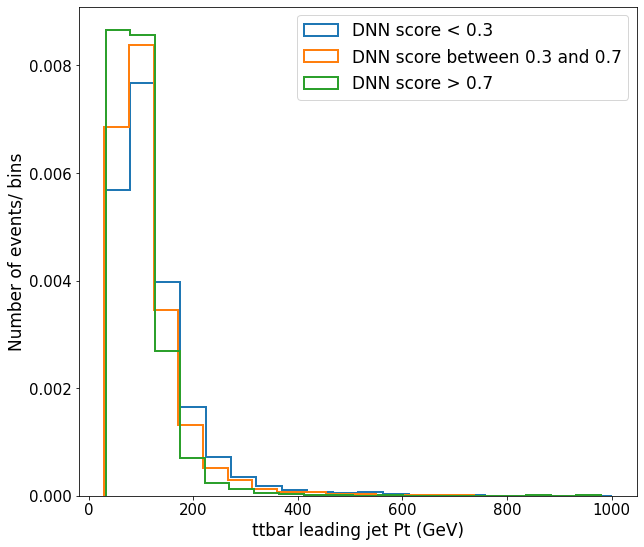

In [413]:
tt_pt_1 = np.array(tt_pt_1)
tt_pt_2 = np.array(tt_pt_2)
tt_pt_3 = np.array(tt_pt_3)

fig,ax  = plt.subplots(figsize=(10,9))
ns1,bins1,patches = ax.hist(tt_pt_1[tt_pt_1 < 1000], histtype='step', bins=20, label = 'DNN score < 0.3'      , linewidth=2, density=True)
ns2,bins1,patches = ax.hist(tt_pt_2[tt_pt_2 < 1000], histtype='step', bins=20, label = 'DNN score between 0.3 and 0.7', linewidth=2, density=True)
ns3,bins1,patches = ax.hist(tt_pt_3[tt_pt_3 < 1000], histtype='step', bins=20, label = 'DNN score > 0.7', linewidth=2, density=True)
ax.set_ylabel('Number of events/ bins', fontsize=17)
ax.set_xlabel('ttbar leading jet Pt (GeV)', fontsize=17)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

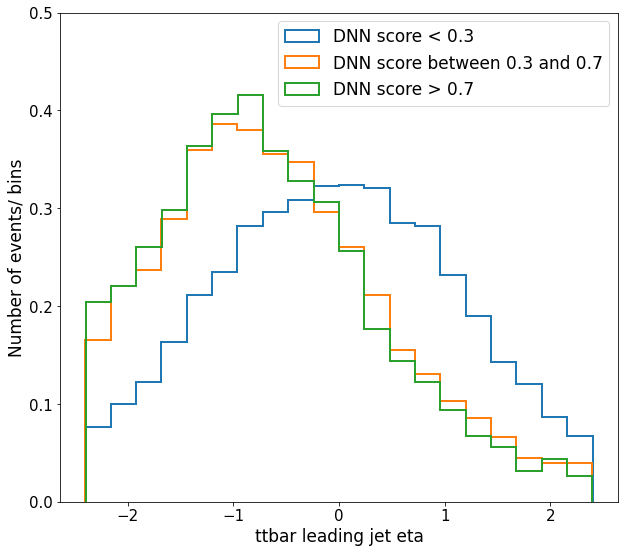

In [412]:
tt_eta_1 = np.array(tt_eta_1)
tt_eta_2 = np.array(tt_eta_2)
tt_eta_3 = np.array(tt_eta_3)

fig,ax  = plt.subplots(figsize=(10,9))
ns1,bins1,patches = ax.hist(tt_eta_1, histtype='step', bins=20, label = 'DNN score < 0.3'      , linewidth=2, density=True)
ns2,bins1,patches = ax.hist(tt_eta_2, histtype='step', bins=20, label = 'DNN score between 0.3 and 0.7', linewidth=2, density=True)
ns3,bins1,patches = ax.hist(tt_eta_3, histtype='step', bins=20, label = 'DNN score > 0.7', linewidth=2, density=True)
ax.set_ylabel('Number of events/ bins', fontsize=17)
ax.set_xlabel('ttbar leading jet eta', fontsize=17)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.set_ylim(0,0.5)
ax.legend(prop={'size': 17}, loc='upper right')

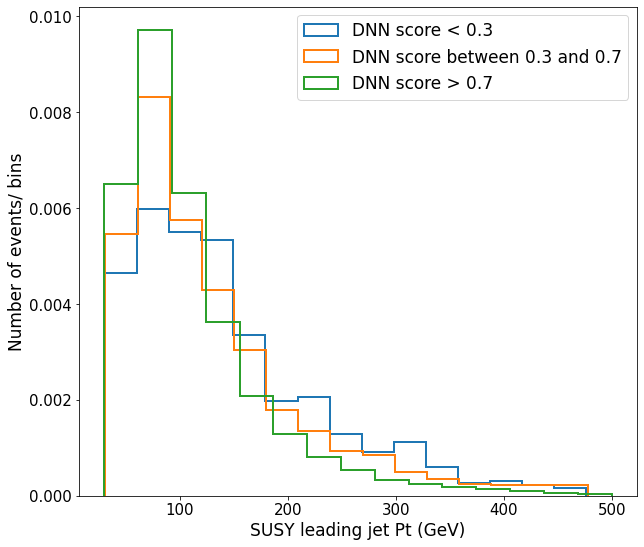

In [414]:
SUSY_pt_1 = np.array(SUSY_pt_1)
SUSY_pt_2 = np.array(SUSY_pt_2)
SUSY_pt_3 = np.array(SUSY_pt_3)

fig,ax  = plt.subplots(figsize=(10,9))
ns1,bins1,patches = ax.hist(SUSY_pt_1[SUSY_pt_1 < 500], histtype='step', bins=15, label = 'DNN score < 0.3'      , linewidth=2, density=True)
ns2,bins1,patches = ax.hist(SUSY_pt_2[SUSY_pt_2 < 500], histtype='step', bins=15, label = 'DNN score between 0.3 and 0.7', linewidth=2, density=True)
ns3,bins1,patches = ax.hist(SUSY_pt_3[SUSY_pt_3 < 500], histtype='step', bins=15, label = 'DNN score > 0.7', linewidth=2, density=True)
ax.set_ylabel('Number of events/ bins', fontsize=17)
ax.set_xlabel('SUSY leading jet Pt (GeV)', fontsize=17)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

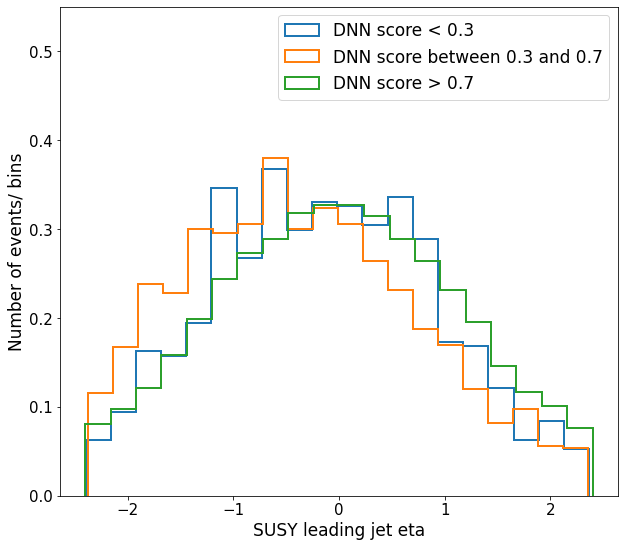

In [415]:
tt_eta_1 = np.array(tt_eta_1)
tt_eta_2 = np.array(tt_eta_2)
tt_eta_3 = np.array(tt_eta_3)

fig,ax  = plt.subplots(figsize=(10,9))
ns1,bins1,patches = ax.hist(SUSY_eta_1, histtype='step', bins=20, label = 'DNN score < 0.3'      , linewidth=2, density=True)
ns2,bins1,patches = ax.hist(SUSY_eta_2, histtype='step', bins=20, label = 'DNN score between 0.3 and 0.7', linewidth=2, density=True)
ns3,bins1,patches = ax.hist(SUSY_eta_3, histtype='step', bins=20, label = 'DNN score > 0.7', linewidth=2, density=True)
ax.set_ylabel('Number of events/ bins', fontsize=17)
ax.set_xlabel('SUSY leading jet eta', fontsize=17)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.set_ylim(0,0.55)
ax.legend(prop={'size': 17}, loc='upper right')

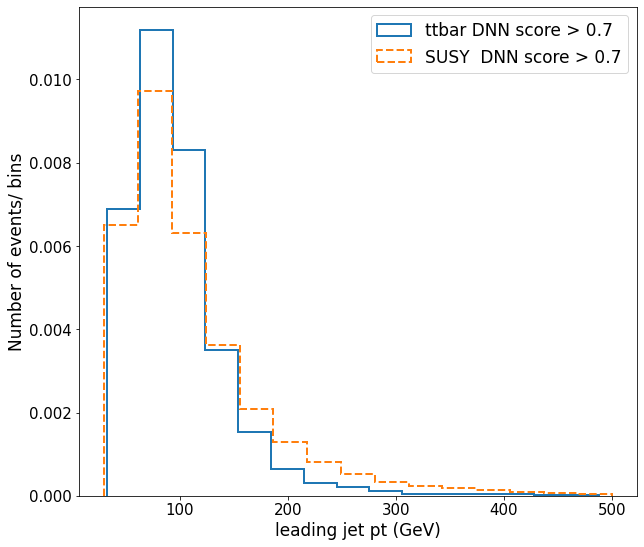

In [424]:
fig,ax  = plt.subplots(figsize=(10,9))
#ns1,bins1,patches = ax.hist(tt_pt_1[tt_pt_1 < 500]    , histtype='step', bins=15, label = 'ttbar DNN score < 0.3', linewidth=2, density=True)
#ns2,bins1,patches = ax.hist(SUSY_pt_1[SUSY_pt_1 < 500], histtype='step', bins=15, label = 'SUSY  DNN score < 0.3', linewidth=2, density=True , linestyle='dashed')

#ns3,bins3,patches = ax.hist(tt_pt_2 [tt_pt_2 < 500] , histtype='step', bins=15, label = 'ttbar DNN score bw 0.3 and 0.7', linewidth=2, density=True)
#ns4,bins4,patches = ax.hist(SUSY_pt_2[SUSY_pt_2 < 500], histtype='step', bins=15, label = 'SUSY  DNN score bw 0.3 and 0.7', linewidth=2, density=True , linestyle='dashed')

ns5,bins5,patches = ax.hist(tt_pt_3[tt_pt_3 < 500]  , histtype='step', bins=15, label = 'ttbar DNN score > 0.7', linewidth=2, density=True)
ns6,bins6,patches = ax.hist(SUSY_pt_3[SUSY_pt_3 < 500] , histtype='step', bins=15, label = 'SUSY  DNN score > 0.7', linewidth=2, density=True , linestyle='dashed')

ax.set_ylabel('Number of events/ bins', fontsize=17)
ax.set_xlabel('leading jet pt (GeV)', fontsize=17)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
#ax.set_ylim(0,0.5)
#ax.set_xlim(-2.4,2.4)
ax.legend(prop={'size': 17}, loc='upper right')

In [7]:
SUSY_pdf_unc = SUSY_pdf_mat.std(0)/ SUSY_pdf_mat.mean(0) * 0.41 * 100
SUSY_pdf_unc

matrix([[3.43634075, 3.39423429, 3.37895098, 3.44081085, 3.45490626,
         3.50455653, 3.66238193, 3.66835957, 3.51062202, 3.41869839,
         3.57348948, 3.60800591, 3.70326109, 3.4778806 , 3.49104879]])

In [8]:
SUSY_ren_unc = SUSY_ren_mat.std(0)/ SUSY_ren_mat.mean(0) * 0.5 * 100
SUSY_ren_unc

matrix([[5.0759458 , 5.12548808, 5.10724617, 5.1243596 , 5.12173774,
         5.12170558, 5.12736203, 5.12979268, 5.11690197, 5.10516608,
         5.1219524 , 5.10458929, 5.13261212, 5.11570261, 5.11115503]])

In [10]:
Nominal,bins, = np.histogram(SUSY_pred, bins=15)
(SUSY_ren_mat.max(0) - SUSY_ren_mat.min(0)) / Nominal

matrix([[0.02688405, 0.02732184, 0.02716596, 0.02740884, 0.02741367,
         0.02721961, 0.02707351, 0.02706791, 0.02692675, 0.0268888 ,
         0.02698332, 0.02681415, 0.0272687 , 0.02690456, 0.02682035]])